In [75]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [76]:
# Replace 'filename.csv' with the path to your CSV file
df_smote = pd.read_csv('files/df_smote.csv')
coefficients_outside_95 = pd.read_csv('files/coefficients_outside_95.csv')

In [77]:
df_smote.head(5)

,s10,s1,s4,s11,s22,s6,s19,s18,s3,s15,...,a36,a39,a41,a43,a44,a28,a40,a49,fo_probability,fo_computerisation
0,47,72,69,47,13,50,25,28,69,38,...,22,3,0,0,0,25,3,0,0.370,0
1,78,81,72,78,16,66,44,50,81,56,...,0,28,16,0,31,22,6,0,0.400,0
2,56,69,47,53,53,53,50,41,66,38,...,19,50,53,0,50,50,25,19,0.240,0
3,81,81,50,63,25,53,72,50,75,44,...,0,78,0,0,91,13,13,0,0.035,0
4,69,69,75,69,16,56,53,53,78,53,...,0,47,3,0,50,16,19,0,0.015,0


In [78]:
coefficients_outside_95.head(4)

,id,coefficient,skill,skill_description
0,s6,-0.2754,Monitoring,"Monitoring/Assessing performance of yourself, ..."
1,a12,-0.2359,Deductive Reasoning,The ability to apply general rules to specific...
2,s10,-0.2354,Judgment and Decision Making,Considering the relative costs and benefits of...
3,a27,-0.2314,Extent Flexibility,"The ability to bend, stretch, twist, or reach ..."


In [79]:
cols_to_keep = (["a12","a6","s35","s19","a8","s21","s27","s17","s32","a38","s16","s5","s34","s24","s8","fo_probability","fo_computerisation"])

# Drop the other columns
df_smote = df_smote[cols_to_keep]

# Display the first few rows of the DataFrame
df_smote.head(5)

,a12,a6,s35,s19,a8,s21,s27,s17,s32,a38,s16,s5,s34,s24,s8,fo_probability,fo_computerisation
0,47,69,0,25,53,19,0,35,0,13,38,50,0,6,47,0.370,0
1,78,47,0,44,75,22,0,41,13,0,50,81,0,19,72,0.400,0
2,72,47,56,50,72,44,28,35,28,10,41,72,50,28,63,0.240,0
3,75,47,0,72,72,50,0,47,28,0,47,81,0,22,75,0.035,0
4,72,69,0,53,66,44,0,53,19,0,60,75,0,19,63,0.015,0


In [80]:
# Extract coefficients outside the 95% confidence interval
selected_coefficients = coefficients_outside_95[["id","coefficient"]]

In [81]:
# Separate the columns to exclude from normalization
df_exclude = df_smote[['fo_probability', 'fo_computerisation']]

# Drop the columns to exclude from normalization from the original DataFrame
df_to_normalize = df_smote.drop(['fo_probability', 'fo_computerisation'], axis=1)

# Initialize a scaler
scaler = StandardScaler()

# Fit the scaler to the data and transform the data
df_normalized = pd.DataFrame(scaler.fit_transform(df_to_normalize), columns=df_to_normalize.columns)

# Add the columns that were excluded from normalization back to the DataFrame
df_normalized = pd.concat([df_normalized, df_exclude], axis=1)

# Display the first few rows of the normalized DataFrame
df_normalized.head(5)

,a12,a6,s35,s19,a8,s21,s27,s17,s32,a38,s16,s5,s34,s24,s8,fo_probability,fo_computerisation
0,-1.079015,1.856405,-1.413418,-1.058999,-0.932440,-0.288055,-0.479893,-0.329685,-1.274983,0.091116,-0.340998,-0.867557,-0.880389,-1.158594,-0.424432,0.370,0
1,1.605387,0.345037,-1.413418,0.292524,1.167293,-0.093714,-0.479893,0.082373,0.089323,-1.033376,0.523025,1.840890,-0.880389,0.354805,1.544012,0.400,0
2,1.085826,0.345037,1.640104,0.719320,0.880966,1.331460,2.072707,-0.329685,1.663522,-0.168382,-0.124992,1.054566,1.612202,1.402542,0.835372,0.240,0
3,1.345606,0.345037,-1.413418,2.284241,0.880966,1.720144,-0.479893,0.494430,1.663522,-1.033376,0.307019,1.840890,-0.880389,0.704051,1.780226,0.035,0
4,1.085826,1.856405,-1.413418,0.932719,0.308311,1.331460,-0.479893,0.906488,0.719002,-1.033376,1.243044,1.316674,-0.880389,0.354805,0.835372,0.015,0


In [82]:
#
coef_dict = selected_coefficients.set_index('id')['coefficient'].to_dict()

for col in df_normalized.columns:
    if col.startswith(('a', 's')):
        df_normalized[f'weight_{col}'] = coef_dict.get(col, 1)
        
print("Keys in coef_dict:", coef_dict.keys())

relevant_cols = [col for col in df_normalized.columns if col.startswith(('a', 's'))]
print("Relevant columns in df_calculate_automation:", relevant_cols)

df_normalized.head(5)

Keys in coef_dict: dict_keys(['s6', 'a12', 's10', 'a27', 'a31', 'a6', 's13', 'a30', 'a5', 'a48', 's35', 'a33', 's19', 's3', 'a3', 'a36', 's2', 's15', 'a8', 'a18', 's18', 's21', 's27', 's26', 's17', 'a39', 'a24', 'a51', 'a47', 'a16', 'a1', 'a7', 's32', 'a38', 's16', 's5', 'a43', 'a35', 'a11', 'a9', 'a28', 's25', 's14', 'a49', 'a40', 'a4', 'a22', 's1', 's34', 'a20', 's30', 's29', 's24', 'a14', 's20', 'a34', 'a29', 'a10', 'a41', 'a25', 's7', 's8'])
Relevant columns in df_calculate_automation: ['a12', 'a6', 's35', 's19', 'a8', 's21', 's27', 's17', 's32', 'a38', 's16', 's5', 's34', 's24', 's8']


,a12,a6,s35,s19,a8,s21,s27,s17,s32,a38,...,weight_s21,weight_s27,weight_s17,weight_s32,weight_a38,weight_s16,weight_s5,weight_s34,weight_s24,weight_s8
0,-1.079015,1.856405,-1.413418,-1.058999,-0.932440,-0.288055,-0.479893,-0.329685,-1.274983,0.091116,...,-0.0891,-0.0888,-0.0805,0.059,0.0591,0.0627,0.0689,0.1226,0.1663,0.2642
1,1.605387,0.345037,-1.413418,0.292524,1.167293,-0.093714,-0.479893,0.082373,0.089323,-1.033376,...,-0.0891,-0.0888,-0.0805,0.059,0.0591,0.0627,0.0689,0.1226,0.1663,0.2642
2,1.085826,0.345037,1.640104,0.719320,0.880966,1.331460,2.072707,-0.329685,1.663522,-0.168382,...,-0.0891,-0.0888,-0.0805,0.059,0.0591,0.0627,0.0689,0.1226,0.1663,0.2642
3,1.345606,0.345037,-1.413418,2.284241,0.880966,1.720144,-0.479893,0.494430,1.663522,-1.033376,...,-0.0891,-0.0888,-0.0805,0.059,0.0591,0.0627,0.0689,0.1226,0.1663,0.2642
4,1.085826,1.856405,-1.413418,0.932719,0.308311,1.331460,-0.479893,0.906488,0.719002,-1.033376,...,-0.0891,-0.0888,-0.0805,0.059,0.0591,0.0627,0.0689,0.1226,0.1663,0.2642


In [83]:
weighted_cols = [col for col in df_normalized.columns if col.startswith(('a', 's'))]

df_normalized['weighted_sum'] = 0

for col in weighted_cols:
    df_normalized['weighted_sum'] += df_normalized[col] * df_normalized[f'weight_{col}']
    
df_normalized.head(5)

,a12,a6,s35,s19,a8,s21,s27,s17,s32,a38,...,weight_s27,weight_s17,weight_s32,weight_a38,weight_s16,weight_s5,weight_s34,weight_s24,weight_s8,weighted_sum
0,-1.079015,1.856405,-1.413418,-1.058999,-0.932440,-0.288055,-0.479893,-0.329685,-1.274983,0.091116,...,-0.0888,-0.0805,0.059,0.0591,0.0627,0.0689,0.1226,0.1663,0.2642,-0.165545
1,1.605387,0.345037,-1.413418,0.292524,1.167293,-0.093714,-0.479893,0.082373,0.089323,-1.033376,...,-0.0888,-0.0805,0.059,0.0591,0.0627,0.0689,0.1226,0.1663,0.2642,0.104470
2,1.085826,0.345037,1.640104,0.719320,0.880966,1.331460,2.072707,-0.329685,1.663522,-0.168382,...,-0.0888,-0.0805,0.059,0.0591,0.0627,0.0689,0.1226,0.1663,0.2642,-0.249623
3,1.345606,0.345037,-1.413418,2.284241,0.880966,1.720144,-0.479893,0.494430,1.663522,-1.033376,...,-0.0888,-0.0805,0.059,0.0591,0.0627,0.0689,0.1226,0.1663,0.2642,-0.090142
4,1.085826,1.856405,-1.413418,0.932719,0.308311,1.331460,-0.479893,0.906488,0.719002,-1.033376,...,-0.0888,-0.0805,0.059,0.0591,0.0627,0.0689,0.1226,0.1663,0.2642,-0.451520


In [84]:
df_normalized['automation_probability'] = df_normalized['weighted_sum'].apply(lambda x: 1 / (1 + np.exp(-x)))

In [85]:
df_normalized.nlargest(5, 'automation_probability')

,a12,a6,s35,s19,a8,s21,s27,s17,s32,a38,...,weight_s17,weight_s32,weight_a38,weight_s16,weight_s5,weight_s34,weight_s24,weight_s8,weighted_sum,automation_probability
129,-1.079015,-1.166332,-1.413418,-1.058999,-1.505095,-1.324546,-0.479893,0.082373,0.719002,0.350614,...,-0.0805,0.059,0.0591,0.0627,0.0689,0.1226,0.1663,0.2642,0.808375,0.691763
119,-1.079015,-0.754140,-0.540983,-1.058999,-0.932440,-1.518887,-0.479893,-0.329685,-0.225517,-0.168382,...,-0.0805,0.059,0.0591,0.0627,0.0689,0.1226,0.1663,0.2642,0.730526,0.674921
331,-1.079015,-0.754140,-0.595510,-1.058999,-0.932440,-1.518887,-0.479893,-0.329685,-0.330464,-0.254882,...,-0.0805,0.059,0.0591,0.0627,0.0689,0.1226,0.1663,0.2642,0.697541,0.667642
286,-1.598577,-1.990715,0.658615,-2.125991,-1.505095,-1.324546,-0.479893,-1.016447,-1.274983,0.869610,...,-0.0805,0.059,0.0591,0.0627,0.0689,0.1226,0.1663,0.2642,0.682873,0.664380
287,-1.598577,-1.990715,0.658615,-2.125991,-1.505095,-1.324546,-0.479893,-1.016447,-1.274983,0.869610,...,-0.0805,0.059,0.0591,0.0627,0.0689,0.1226,0.1663,0.2642,0.682873,0.664380


In [86]:
df_normalized.nsmallest(5, 'automation_probability')

,a12,a6,s35,s19,a8,s21,s27,s17,s32,a38,...,weight_s17,weight_s32,weight_a38,weight_s16,weight_s5,weight_s34,weight_s24,weight_s8,weighted_sum,automation_probability
151,1.085826,0.345037,2.676120,0.719320,1.167293,1.331460,4.625307,0.494430,-1.274983,1.648104,...,-0.0805,0.059,0.0591,0.0627,0.0689,0.1226,0.1663,0.2642,-0.955878,0.277704
28,1.345606,2.268597,-0.213820,1.644046,1.167293,3.339660,-0.479893,0.700459,1.033842,-1.033376,...,-0.0805,0.059,0.0591,0.0627,0.0689,0.1226,0.1663,0.2642,-0.913699,0.286243
19,1.605387,0.345037,1.476522,1.146117,2.980700,0.294970,-0.479893,0.494430,0.089323,0.091116,...,-0.0805,0.059,0.0591,0.0627,0.0689,0.1226,0.1663,0.2642,-0.856417,0.298089
14,2.211543,1.238118,-0.050239,1.146117,2.980700,1.331460,-0.479893,0.494430,0.719002,-1.033376,...,-0.0805,0.059,0.0591,0.0627,0.0689,0.1226,0.1663,0.2642,-0.829835,0.303680
231,1.085826,2.062501,-0.050239,1.430648,0.880966,2.756634,-0.479893,0.700459,0.089323,-1.033376,...,-0.0805,0.059,0.0591,0.0627,0.0689,0.1226,0.1663,0.2642,-0.788300,0.312534


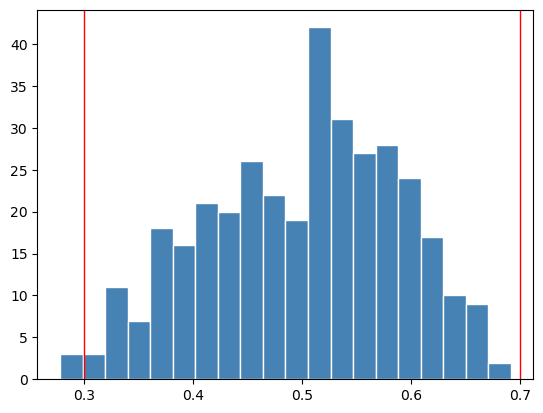

In [87]:
# Get the values
x = df_normalized["automation_probability"].values

# Calculate the histogram
hist, bins = np.histogram(x, bins=20)

# Calculate the width and center of the bars
width = 1 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2

# Plot the histogram
plt.bar(center, hist, align='center', width=width, color='#4682B4', edgecolor='white')

# Add lines at 0.3 and 0.7
plt.axvline(0.3, color='r', linewidth=1)
plt.axvline(0.7, color='r', linewidth=1)

# Show the plot
plt.show()

In [88]:
# Count the number of jobs with automation probability below 0.3
jobs_below_03 = (df_normalized["automation_probability"] < 0.3).sum()
print(f"Number of jobs with automation probability pi | pi <= 0.3: {jobs_below_03}")

# Count the number of jobs with automation probability between 0.3 and 0.7
jobs_between_03_and_07 = ((df_normalized["automation_probability"] >= 0.31) & (df_normalized["automation_probability"] <= 0.7)).sum()
print(f"Number of jobs with automation probability | pi 0.3 < pi <= 0.7 : {jobs_between_03_and_07}")

# Count the number of jobs with automation probability > 0.7
jobs_above_07 = (df_normalized["automation_probability"] > 0.7).sum()
print(f"Number of jobs with automation probability | pi pi > 0.7: {jobs_above_07}")

Number of jobs with automation probability pi | pi <= 0.3: 3
Number of jobs with automation probability | pi 0.3 < pi <= 0.7 : 352
Number of jobs with automation probability | pi pi > 0.7: 0
